# **3MTT MODULE 2 PROJECT**
# **Name: EMMANUEL OBIORAH**
## **Cohort 3 Fellow ID: FE/24/4793145479**
### **Project Goal: Analyze, clean, and visualize sales data to extract insights using Python.**

In [31]:
# Step 1: Import Required Libraries
import pandas as pd             # For data manipulation
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns           # For statistical data visualization


In [7]:
nazz_hub = pd.read_csv('/content/Dataset (1).csv')


In [16]:
nazz_hub.head(200)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Month,DayOfWeek
0,1,2024-04-12,C002,Phone,1,600,642.09,2024-04,Friday
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,2024-12,Saturday
2,3,2024-09-27,C017,Monitor,1,200,196.34,2024-09,Friday
3,4,2024-04-16,C005,Phone,3,600,1955.86,2024-04,Tuesday
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,2024-03,Tuesday
...,...,...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37,2024-04,Monday
196,197,2024-11-13,C017,Laptop,1,1000,1066.13,2024-11,Wednesday
197,198,2024-02-21,C019,Tablet,1,400,387.62,2024-02,Wednesday
198,199,2024-09-24,C005,Phone,2,600,1265.72,2024-09,Tuesday


In [23]:
# Convert 'Date' to datetime format
nazz_hub['Date'] = pd.to_datetime(nazz_hub['Date'])

# Drop rows with missing 'Total' values
nazz_hub = nazz_hub.dropna(subset=['Total'])

# Remove duplicates
nazz_hub.drop_duplicates(inplace=True)

# Remove invalid Quantity or Total entries
nazz_hub = nazz_hub[(nazz_hub['Quantity'] > 0) & (nazz_hub['Total'] > 0)]

# Remove invalid Quantity or Total entries
nazz_hub = nazz_hub[(nazz_hub['Quantity'] > 0) & (nazz_hub['Total'] > 0)]

# Add derived columns for analysis
nazz_hub['Month'] = nazz_hub['Date'].dt.to_period('M')
nazz_hub['DayOfWeek'] = nazz_hub['Date'].dt.day_name()

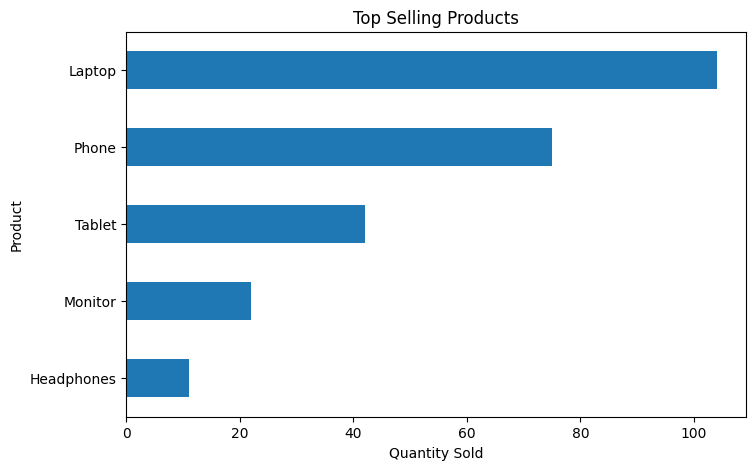

In [32]:
# Visualize Top Selling Products by Quantity

nazz_hub.groupby('Product')['Quantity'].sum().sort_values().plot(kind='barh', figsize=(8,5), title='Top Selling Products')
plt.xlabel('Quantity Sold')
plt.show()


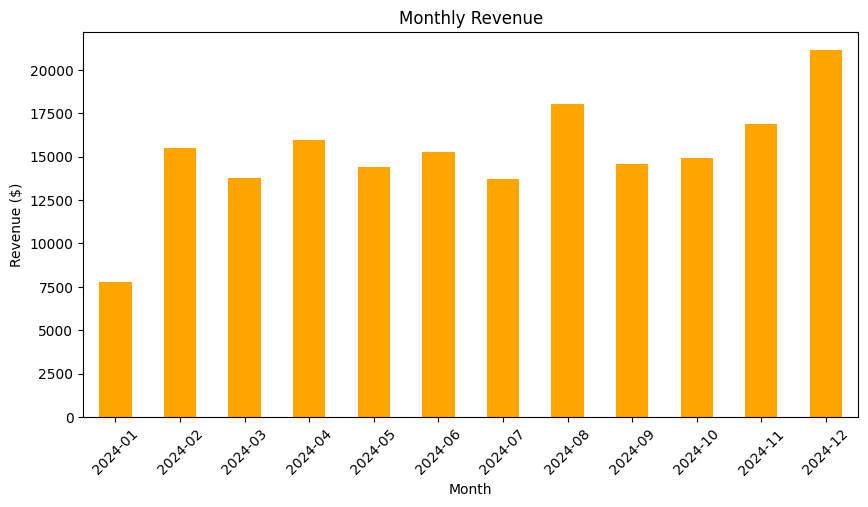

In [34]:
# Visualize Monthly Revenue

nazz_hub.groupby('Month')['Total'].sum().plot(kind='bar', figsize=(10,5), color='orange', title='Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()


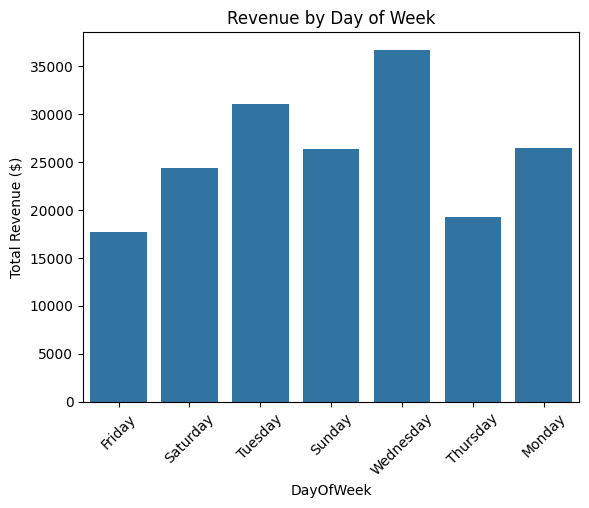

In [35]:
# Revenue by Day of the Week
sns.barplot(x='DayOfWeek', y='Total', data=nazz_hub, estimator=sum, ci=None)
plt.title('Revenue by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue ($)')
plt.show()


In [28]:
# Average Order Value
print("Average Order Value: $", round(nazz_hub['Total'].mean(), 2))

# Total Revenue
print("Total Revenue: $", round(nazz_hub['Total'].sum(), 2))

# Unique Customers
print("Unique Customers:", nazz_hub['CustomerID'].nunique())

# Most Profitable Product
top_product = nazz_hub.groupby('Product')['Total'].sum().idxmax()
top_product_revenue = nazz_hub.groupby('Product')['Total'].sum().max()
print("Most Profitable Product:", top_product)
print("Revenue from that product: $", round(top_product_revenue, 2))


Average Order Value: $ 937.64
Total Revenue: $ 181901.91
Unique Customers: 20
Most Profitable Product: Laptop
Revenue from that product: $ 103405.98
